In [1]:
import pandas as pd
import numpy as np

# ANOVA 하기 위한 코드
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

# 다중비교 (Tukey)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 지수 표현 없애기 위해 
pd.options.display.float_format = '{:.4f}'.format

# 박스 플롯 때문
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# 독립 t검정
from scipy.stats import ttest_ind
# 대응 t검정
from scipy.stats import ttest_rel

In [20]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

## 카드 소비 데이터 분산분석

In [7]:
card_df = pd.read_csv('datasets/month_card_spending.csv')
card_df

,m,emd_cd,emd_nm,count_num,mct_cat_cd,mct_cat_nm,sum_use_cnt,sum_use_amt
0,2018-01,50110590,건입동,31,C00400,간식,4540.0000,52714107.0000
1,2018-01,50110590,건입동,31,C01200,농축수산물,1699.0000,180535251.0000
2,2018-01,50110590,건입동,31,A00200,마트/슈퍼마켓,17547.0000,613458055.0000
3,2018-01,50110590,건입동,30,C01400,배달,585.0000,11571838.0000
4,2018-01,50110590,건입동,9,C00700,부페,55.0000,5081850.0000
...,...,...,...,...,...,...,...,...
20000,2021-06,50130550,효돈동,30,C00300,아시아음식,720.0000,25716378.0000
20001,2021-06,50130550,효돈동,20,C00200,양식,225.0000,9302910.0000
20002,2021-06,50130550,효돈동,16,C00900,주점및주류판매,105.0000,4039593.0000
20003,2021-06,50130550,효돈동,30,C00500,패스트푸드,1205.0000,20827922.0000


### sum_use_cnt~ 분산분석

In [115]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_use_cnt ~ C(mct_cat_nm)', card_df).fit()

print(anova_lm(model))

                      df             sum_sq           mean_sq        F  PR(>F)
C(mct_cat_nm)    10.0000 2108655240553.2522 210865524055.3252 959.2299  0.0000
Residual      19994.0000 4395239719314.7695    219827934.3460      nan     nan


In [116]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(card_df['sum_use_cnt'], card_df['mct_cat_nm'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
     간식   농축수산물  -3764.6488  0.001  -5334.7913  -2194.5063   True
     간식 마트/슈퍼마켓  22622.0038  0.001  21051.8613  24192.1463   True
     간식      배달  -2613.6989  0.001  -4184.0539  -1043.3439   True
     간식      부페   -6555.591  0.001  -8203.8327  -4907.3494   True
     간식      식품   3065.0779  0.001   1494.9354   4635.2204   True
     간식   아시아음식   -3627.914  0.001  -5198.0565  -2057.7715   True
     간식      양식  -5221.6342  0.001   -6792.628  -3650.6405   True
     간식 주점및주류판매  -6048.3475  0.001  -7619.5546  -4477.1404   True
     간식   패스트푸드  -1232.2278 0.2894  -2802.3703    337.9147  False
     간식      한식  22896.6461  0.001  21326.5036  24466.7886   True
  농축수산물 마트/슈퍼마켓  26386.6526  0.001  24816.5101  27956.7951   True
  농축수산물      배달   1150.9499 0.3962   -419.4051   2721.3049  False
  농축수산물   

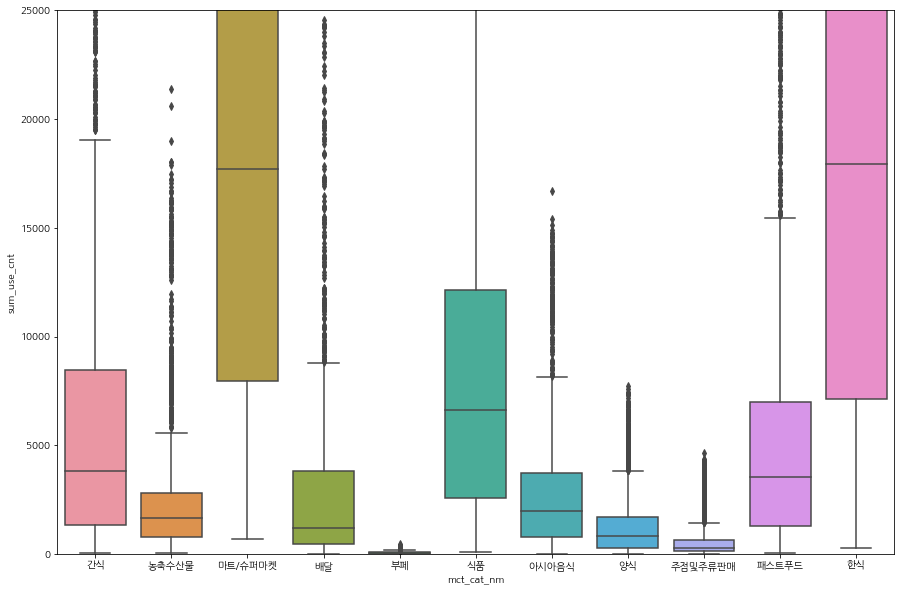

In [80]:
x = card_df['mct_cat_nm']
y = card_df['sum_use_cnt']

# y축 로그변환
#y = np.log(card_df['sum_use_cnt'])

sns.boxplot(x, y, data=card_df)


plt.ylim(0, 25000)
plt.show()### sum_use_cnt~ 분산분석### sum_use_cnt~ 분산분석


# 그룹화
# 마트/슈퍼마켓, 한식### sum_use_cnt~ 분산분석
# 식품
# 간식, 패스트푸드
# 농축수산물, 아시아음식
# 배달, 양식
# 주점및주류판매
# 부페

<AxesSubplot:xlabel='mct_cat_nm', ylabel='sum_use_cnt'>

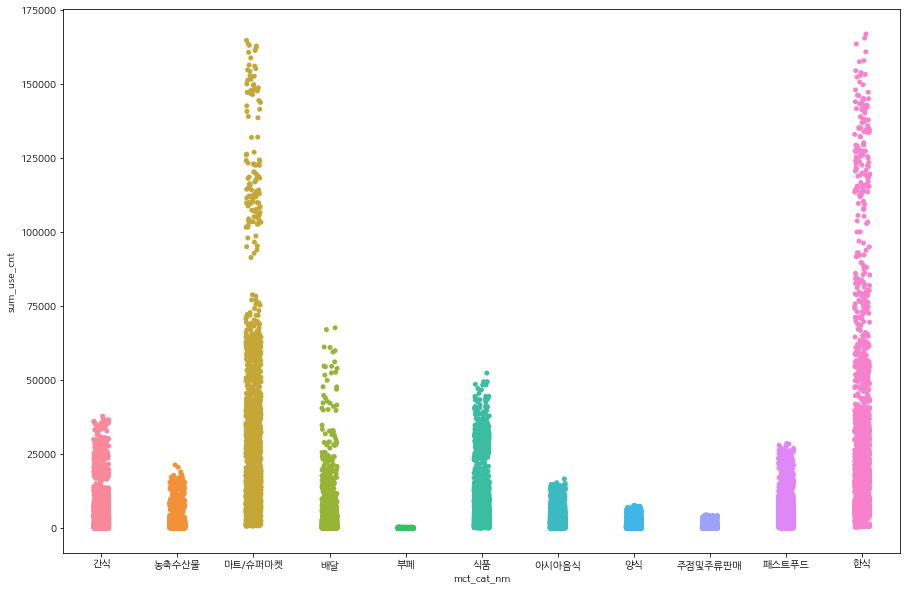

In [75]:
sns.stripplot(x, y, data=card_df)

### 그룹화

In [128]:
# 그룹화
# 1. 마트/슈퍼마켓, 한식
# 2. 식품
# 3. 간식, 패스트푸드
# 4. 농축수산물, 아시아음식
# 5. 배달, 양식
# 6. 주점및주류판매
# 7. 부페### 그룹화

a = card_df[card_df['mct_cat_nm']=='간식']
b = card_df[card_df['mct_cat_nm']=='농축수산물']
c = card_df[card_df['mct_cat_nm']=='마트/슈퍼마켓']
d = card_df[card_df['mct_cat_nm']=='배달']
e = card_df[card_df['mct_cat_nm']=='부페']
f = card_df[card_df['mct_cat_nm']=='식품']
g = card_df[card_df['mct_cat_nm']=='아시아음식']
h = card_df[card_df['mct_cat_nm']=='양식']
i = card_df[card_df['mct_cat_nm']=='주점및주류판매']
j = card_df[card_df['mct_cat_nm']=='패스트푸드']
k = card_df[card_df['mct_cat_nm']=='한식']

In [129]:
# 1. 마트/슈퍼마켓, 한식
ttest_ind(c['sum_use_cnt'], k['sum_use_cnt'])

Ttest_indResult(statistic=-0.25774919591890866, pvalue=0.7966148329642857)

In [107]:
# 3. 간식, 패스트푸드
ttest_ind(a['sum_use_cnt'], j['sum_use_cnt'])

Ttest_indResult(statistic=5.560725211975678, pvalue=2.8769374405517984e-08)

In [108]:
# 4. 농축수산물, 아시아음식
ttest_ind(b['sum_use_cnt'], g['sum_use_cnt'])

Ttest_indResult(statistic=-1.2277006307060874, pvalue=0.2196375947809361)

In [109]:
# 5. 배달, 양식
ttest_ind(d['sum_use_cnt'], h['sum_use_cnt'])

Ttest_indResult(statistic=13.878011249400933, pvalue=1.002784122753039e-42)

## sum_use_amt~ 분산분석

In [60]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_use_amt ~ C(mct_cat_nm)', card_df).fit()

print(anova_lm(model))

                      df                      sum_sq                    mean_sq         F  PR(>F)
C(mct_cat_nm)    10.0000 2374434764442465468416.0000 237443476444246540288.0000 1153.9789  0.0000
Residual      19994.0000 4113979060183808606208.0000    205760681213554496.0000       nan     nan


In [61]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(card_df['sum_use_amt'], card_df['mct_cat_nm'], alpha=0.05)
print(posthoc)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
 group1  group2     meandiff     p-adj       lower            upper      reject
-------------------------------------------------------------------------------
     간식   농축수산물   111801828.0611  0.001    63764501.8448  159839154.2775   True
     간식 마트/슈퍼마켓   928536621.3166  0.001   880499295.1002  976573947.5329   True
     간식      배달     14001103.641    0.9   -34042724.2099   62044931.4918  False
     간식      부페   -74270333.3572  0.001  -124697043.7254  -23843622.9889   True
     간식      식품   292326969.9686  0.001   244289643.7523  340364296.1849   True
     간식   아시아음식    30498281.3885 0.6012   -17539044.8278   78535607.6049  False
     간식      양식   -27857882.3241 0.7118   -75921252.0914   20205487.4432  False
     간식 주점및주류판매   -55849249.4057 0.0085  -103919145.5127   -7779353.2987   True
     간식   패스트푸드    11970762.5487    0.9   -36066563.6676    60008088.765  False
     간식      한식    848117267.441  0.001 

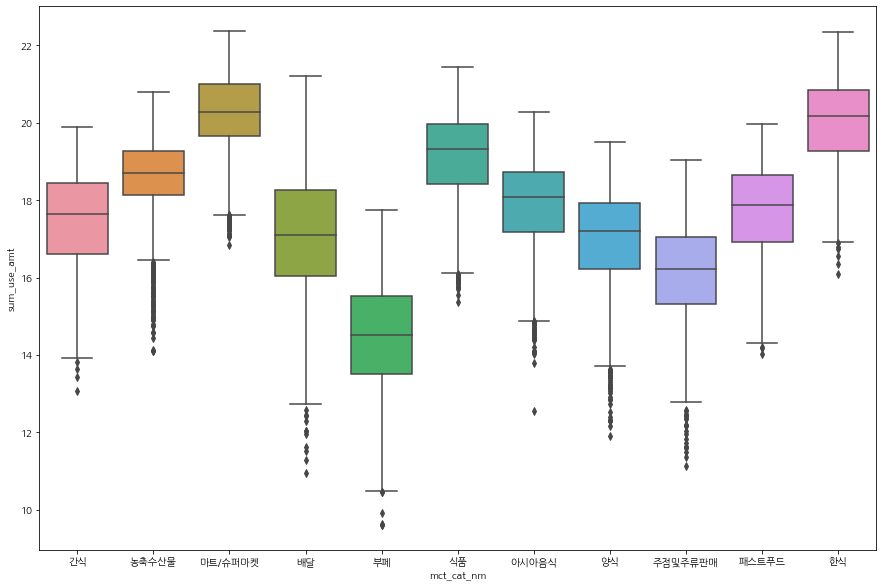

In [92]:
x = card_df['mct_cat_nm']
y = card_df['sum_use_amt']

# y축 로그변환
y = np.log(card_df['sum_use_amt'])

sns.boxplot(x, y, data=card_df)

#plt.ylim(0, 2)
plt.show()


# 그룹화
# 마트/슈퍼마켓, 한식
# 식품
# 간식, 패스트푸드
# 농축수산물, 아시아음식
# 배달, 양식
# 주점및주류판매
# 부페

<AxesSubplot:xlabel='mct_cat_nm', ylabel='sum_use_amt'>

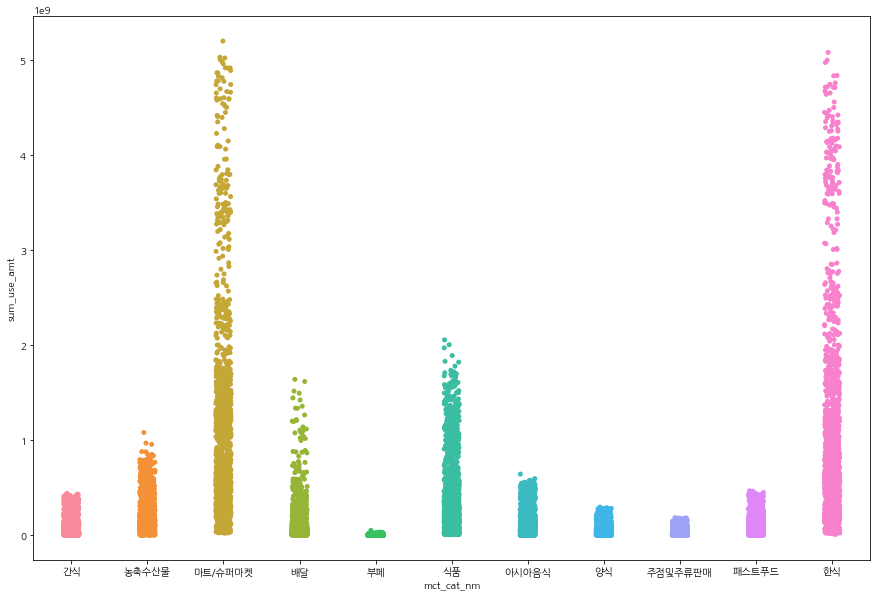

In [87]:
sns.stripplot(x, y, data=card_df)

### 그룹화

In [110]:
# 그룹화
# 1. 마트/슈퍼마켓, 한식
# 2. 식품
# 3. 간식, 패스트푸드
# 4. 농축수산물, 아시아음식
# 5. 배달, 양식
# 6. 주점및주류판매
# 7. 부페

a = card_df[card_df['mct_cat_nm']=='간식']
b = card_df[card_df['mct_cat_nm']=='농축수산물']
c = card_df[card_df['mct_cat_nm']=='마트/슈퍼마켓']
d = card_df[card_df['mct_cat_nm']=='배달']
e = card_df[card_df['mct_cat_nm']=='부페']### 그룹화
f = card_df[card_df['mct_cat_nm']=='식품']
g = card_df[card_df['mct_cat_nm']=='아시아음식']
h = card_df[card_df['mct_cat_nm']=='양식']
i = card_df[card_df['mct_cat_nm']=='주점및주류판매']
j = card_df[card_df['mct_cat_nm']=='패스트푸드']
k = card_df[card_df['mct_cat_nm']=='한식']

In [111]:
# 1. 마트/슈퍼마켓, 한식(기각) -> 유의수준 0.01로 하면 기각 x
ttest_ind(c['sum_use_amt'], k['sum_use_amt'])

Ttest_indResult(statistic=2.4572208731801375, pvalue=0.014047303954801896)

In [112]:
# 3. 간식, 패스트푸드
ttest_ind(a['sum_use_amt'], j['sum_use_amt'])

Ttest_indResult(statistic=-3.985338297000961, pvalue=6.868515740950504e-05)

In [113]:
# 4. 농축수산물, 아시아음식
ttest_ind(b['sum_use_amt'], g['sum_use_amt'])

Ttest_indResult(statistic=16.494576928806385, pvalue=4.935706286700319e-59)

In [114]:
# 5. 배달, 양식
ttest_ind(d['sum_use_amt'], h['sum_use_amt'])

Ttest_indResult(statistic=9.195110879913047, pvalue=6.105332694915046e-20)

### 군집화

In [22]:
card_df1 = card_df.groupby('mct_cat_nm').sum()
card_df1 = card_df1.drop('count_num', axis=1)
card_df1

,sum_use_cnt,sum_use_amt
mct_cat_nm,,
간식,12226585.0000,144865710255.0000
농축수산물,5269514.0000,351475488512.0000
마트/슈퍼마켓,54032048.0000,1860801386448.0000
배달,7392467.0000,170647358144.0000
부페,92908.0000,6324510830.0000
식품,17890849.0000,685085950757.0000
아시아음식,5522200.0000,201226534261.0000
양식,2571427.0000,93182213106.0000
주점및주류판매,1046400.0000,41543590921.0000


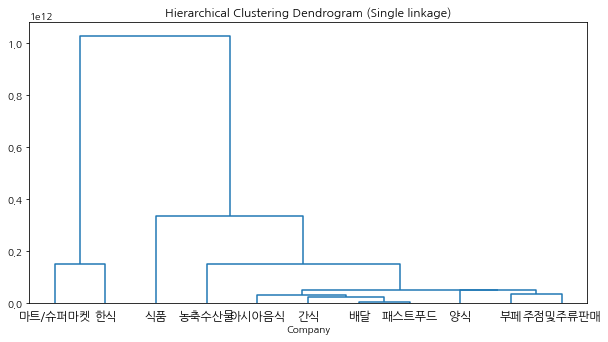

In [23]:
Z = linkage(card_df1, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=card_df1.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

## 내국인 분산분석

In [2]:
korean_df = pd.read_csv('datasets/month_korean.csv')
korean_df

,m,resd,sex,age,emd_cd,emd_nm,count_num,sum_resd_pop_cnt,sum_work_pop_cnt,sum_visit_pop_cnt
0,2018-01,그외,남성,0,50110590,건입동,744,0.0000,3132.2282,76353.2457
1,2018-01,그외,남성,0,50110256,구좌읍,744,0.0000,4161.1501,147835.2530
2,2018-01,그외,남성,0,50130253,남원읍,744,0.0000,2121.0335,249159.0777
3,2018-01,그외,남성,0,50110660,노형동,744,0.0000,17475.4153,333967.8223
4,2018-01,그외,남성,0,50130590,대륜동,744,0.0000,5223.4448,308445.7634
...,...,...,...,...,...,...,...,...,...,...
65011,2021-06,제주,여성,80,50130320,표선면,720,133317.8449,373.1435,18236.7638
65012,2021-06,제주,여성,80,50110310,한경면,720,129052.5282,2082.5446,13292.0757
65013,2021-06,제주,여성,80,50110250,한림읍,720,244482.7666,4236.2232,24978.7051
65014,2021-06,제주,여성,80,50110600,화북동,720,202833.2091,2830.6591,32650.5844


### sum_resd_pop_cnt~ 분산분석

In [43]:
# 일원배치 분산분석(sex)
model = ols('sum_resd_pop_cnt ~ C(sex)', korean_df).fit()

print(anova_lm(model))

                 df                 sum_sq            mean_sq      F  PR(>F)
C(sex)       1.0000     1843852799509.4941 1843852799509.4941 7.5481  0.0060
Residual 65014.0000 15881569818931420.0000  244279229380.3092    nan     nan


In [44]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_resd_pop_cnt'], korean_df['sex'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower     upper    reject
----------------------------------------------------------
    남성     여성 10650.8188 0.006 3052.4684 18249.1692   True
----------------------------------------------------------


In [45]:
# 일원배치 분산분석(resd)
model = ols('sum_resd_pop_cnt ~ C(resd)', korean_df).fit()

print(anova_lm(model))

                 df                 sum_sq               mean_sq          F  \
C(resd)      1.0000  4102593275431151.0000 4102593275431151.0000 22640.6982   
Residual 65014.0000 11780820396299984.0000     181204362080.4747        nan   

          PR(>F)  
C(resd)   0.0000  
Residual     nan  


In [46]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_resd_pop_cnt'], korean_df['resd'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    그외     제주 502399.3909 0.001 495855.1335 508943.6483   True
--------------------------------------------------------------


In [47]:
# 일원배치 분산분석(age)
model = ols('sum_resd_pop_cnt ~ C(age)', korean_df).fit()

print(anova_lm(model))

                 df                 sum_sq             mean_sq        F  \
C(age)       8.0000   629023709327402.7500 78627963665925.3438 335.0752   
Residual 65007.0000 15254389962403552.0000   234657651674.4897      nan   

          PR(>F)  
C(age)    0.0000  
Residual     nan  


In [48]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_resd_pop_cnt'], korean_df['age'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0     10    6647.6439    0.9  -18353.6924   31648.9802  False
     0     20    -63291.53  0.001  -88292.8663  -38290.1937   True
     0     30  -10765.1287    0.9  -35766.4651   14236.2076  False
     0     40   120684.271  0.001   95682.9347  145685.6073   True
     0     50  115880.4843  0.001    90879.148  140881.8206   True
     0     60  -19637.8121 0.2641  -44639.1484    5363.5242  False
     0     70 -135122.0389  0.001 -160123.3752 -110120.7026   True
     0     80 -200276.6708  0.001 -225278.0071 -175275.3344   True
    10     20  -69939.1739  0.001  -94940.5102  -44937.8376   True
    10     30  -17412.7727  0.435   -42414.109    7588.5636  False
    10     40  114036.6271  0.001   89035.2908  139037.9634   True
    10     50  109232.8404  0.001   84231.5041  134234.1767   

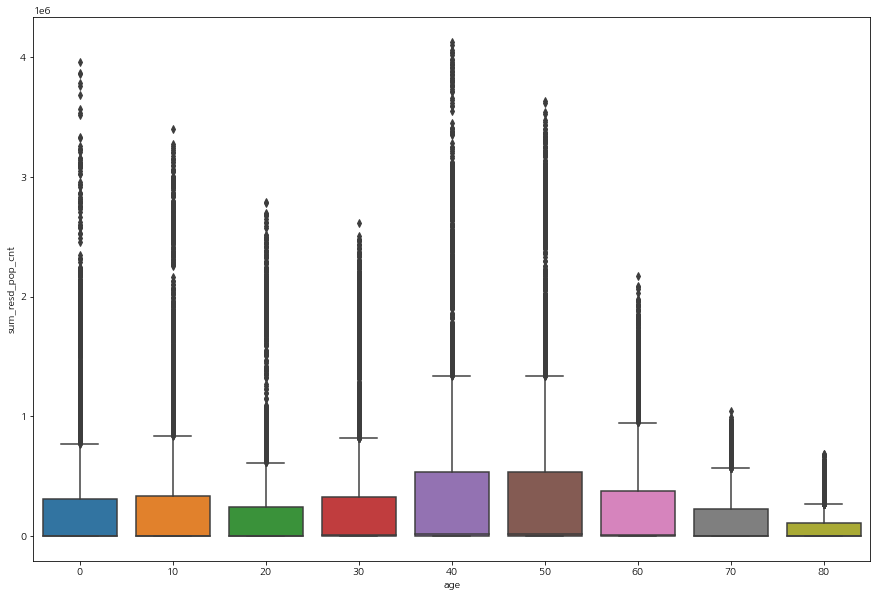

In [98]:
x = korean_df['age']
y = korean_df['sum_resd_pop_cnt']
# y축 로그변환
#y = np.log(korean_df['sum_resd_pop_cnt'])

sns.boxplot(x, y, data=korean_df)

plt.show()


# 그룹화
# 40, 50
# 60
# 0, 10, 30
# 20, 70
# 80

<AxesSubplot:xlabel='age', ylabel='sum_resd_pop_cnt'>

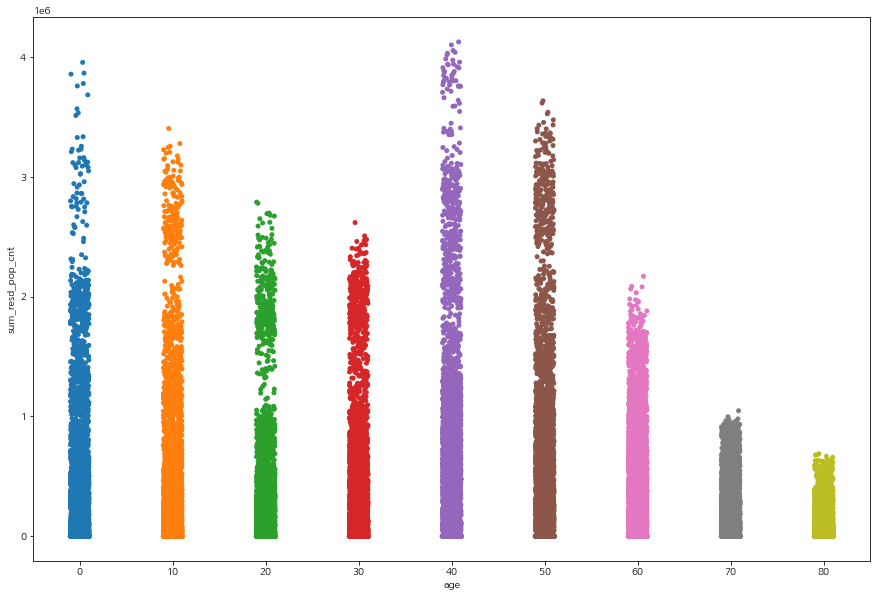

In [69]:
sns.stripplot(x, y, data=korean_df)

### 그룹화

In [135]:
# 그룹화
# 1. 40, 50
# 2. 60
# 3. 0, 10, 30
# 4. 20, 70
# 5. 80

a = korean_df[korean_df['age']==0]
b = korean_df[korean_df['age']==10]
c = korean_df[korean_df['age']==20]
d = korean_df[korean_df['age']==30]
e = korean_df[korean_df['age']==40]
f = korean_df[korean_df['age']==50]
g = korean_df[korean_df['age']==60]
h = korean_df[korean_df['age']==70]
i = korean_df[korean_df['age']==80]

In [136]:
# 1. 40, 50
ttest_ind(e['sum_resd_pop_cnt'], f['sum_resd_pop_cnt'])

Ttest_indResult(statistic=0.42580001824641195, pvalue=0.6702599171021971)

In [137]:
# 3. 0, 10, 30

G1 = pd.concat([a, b, d])


# 일원배치 분산분석(age)
model = ols('sum_resd_pop_cnt ~ C(age)', G1).fit()

print(anova_lm(model))

# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(G1['sum_resd_pop_cnt'], G1['age'], alpha=0.05)
print(posthoc)

                 df                sum_sq           mean_sq      F  PR(>F)
C(age)       2.0000    1115587434682.5093 557793717341.2546 2.1136  0.1208
Residual 21669.0000 5718681108531246.0000 263910706933.0032    nan     nan
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     0     10   6647.6439 0.6986 -13387.2794 26682.5673  False
     0     30 -10765.1287 0.4201 -30800.0521  9269.7946  False
    10     30 -17412.7727 0.1035  -37447.696  2622.1507  False
--------------------------------------------------------------


In [138]:
# 4. 20, 70
ttest_ind(c['sum_resd_pop_cnt'], h['sum_resd_pop_cnt'])

Ttest_indResult(statistic=12.76807729982917, pvalue=3.923810827254532e-37)

### sum_work_pop_cnt~ 분산분석

In [45]:
# 일원배치 분산분석(sex)
model = ols('sum_work_pop_cnt ~ C(sex)', korean_df).fit()

print(anova_lm(model))

                 df               sum_sq           mean_sq       F  PR(>F)
C(sex)       1.0000    201742863829.6020 201742863829.6020 61.8714  0.0000
Residual 65014.0000 211989851961930.2500   3260680037.5601     nan     nan


In [46]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_work_pop_cnt'], korean_df['sex'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    남성     여성 -3523.0513 0.001 -4400.9211 -2645.1814   True
-----------------------------------------------------------


In [47]:
# 일원배치 분산분석(resd)
model = ols('sum_work_pop_cnt ~ C(resd)', korean_df).fit()

print(anova_lm(model))

                 df               sum_sq             mean_sq         F  PR(>F)
C(resd)      1.0000  24454666311470.2695 24454666311470.2695 8468.7423  0.0000
Residual 65014.0000 187736928514290.5000     2887638485.7768       nan     nan


In [48]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_work_pop_cnt'], korean_df['resd'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
    그외     제주 38788.2997 0.001 37962.1715 39614.428   True
----------------------------------------------------------


In [49]:
# 일원배치 분산분석(age)
model = ols('sum_work_pop_cnt ~ C(age)', korean_df).fit()

print(anova_lm(model))

                 df               sum_sq            mean_sq        F  PR(>F)
C(age)       8.0000  14377220324964.3320 1797152540620.5415 590.5915  0.0000
Residual 65007.0000 197814374500795.5625    3042970364.7422      nan     nan


In [50]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_work_pop_cnt'], korean_df['age'], alpha=0.05)
print(posthoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0     10   1207.2242    0.9  -1639.8234   4054.2718  False
     0     20   8522.5262  0.001   5675.4787  11369.5738   True
     0     30   11240.593  0.001   8393.5454  14087.6406   True
     0     40  24958.3967  0.001  22111.3491  27805.4443   True
     0     50  20855.6288  0.001  18008.5813  23702.6764   True
     0     60  -5314.6429  0.001  -8161.6904  -2467.5953   True
     0     70 -17954.2114  0.001  -20801.259 -15107.1638   True
     0     80 -20927.7794  0.001  -23774.827 -18080.7318   True
    10     20    7315.302  0.001   4468.2545  10162.3496   True
    10     30  10033.3688  0.001   7186.3212  12880.4164   True
    10     40  23751.1725  0.001  20904.1249  26598.2201   True
    10     50  19648.4046  0.001   16801.357  22495.4522   True
    10     60  -6521.8671  0.001  -9368.

### 그룹화

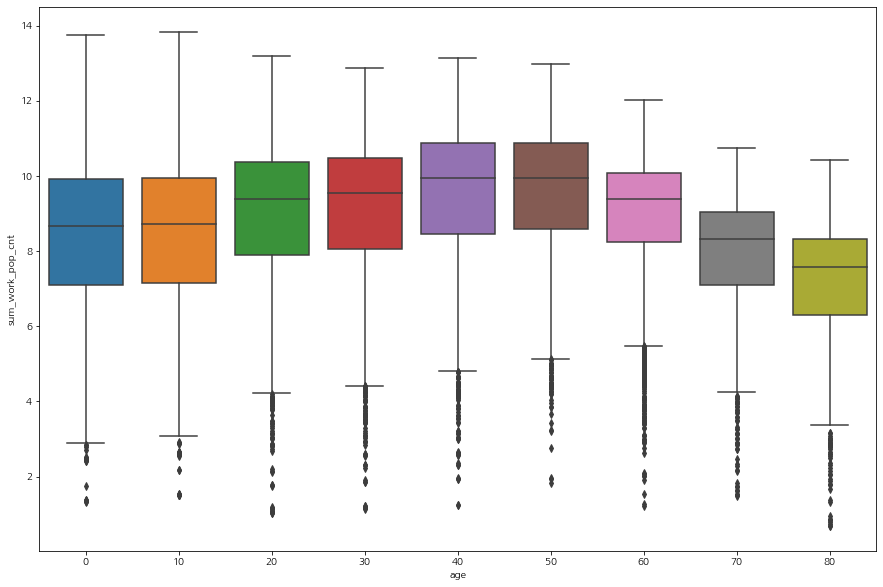

In [145]:
x = korean_df['age']
y = korean_df['sum_work_pop_cnt']
# y축 로그변환
y = np.log(korean_df['sum_work_pop_cnt'])

sns.boxplot(x, y, data=korean_df)

plt.show()


# 그룹화
# 1. 40, 50
# 2. 20, 30, 60
# 3. 0, 10
# 4. 70
# 5. 80

In [8]:
a = korean_df[korean_df['age']==0]
b = korean_df[korean_df['age']==10]
c = korean_df[korean_df['age']==20]
d = korean_df[korean_df['age']==30]
e = korean_df[korean_df['age']==40]
f = korean_df[korean_df['age']==50]
g = korean_df[korean_df['age']==60]
h = korean_df[korean_df['age']==70]
i = korean_df[korean_df['age']==80]

# 그룹화
# 1. 40, 50
# 2. 60
# 3. 0, 10, 30
# 4. 20, 70
# 5. 80

In [20]:
# 1. 40, 50 -> 기각
ttest_ind(e['sum_work_pop_cnt'], f['sum_work_pop_cnt'])

Ttest_indResult(statistic=3.336416717152335, pvalue=0.0008507987040988374)

In [27]:
# 2. 20, 30, 60 -> 기각

G1 = pd.concat([c, d, g])


# 일원배치 분산분석(age)
model = ols('sum_work_pop_cnt ~ C(age)', G1).fit()

print(anova_lm(model))

# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(G1['sum_work_pop_cnt'], G1['age'], alpha=0.05)
print(posthoc)

                 df              sum_sq           mean_sq        F  PR(>F)
C(age)       2.0000  1138817775455.8970 569408887727.9485 209.6116  0.0000
Residual 21669.0000 58863738525313.0859   2716495386.2805      nan     nan
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    20     30   2718.0668 0.0049    685.4118   4750.7217   True
    20     60 -13837.1691  0.001 -15869.8241 -11804.5141   True
    30     60 -16555.2359  0.001 -18587.8908 -14522.5809   True
---------------------------------------------------------------


In [148]:
# 3. 0, 10
ttest_ind(a['sum_work_pop_cnt'], b['sum_work_pop_cnt'])

Ttest_indResult(statistic=-1.1297830239043527, pvalue=0.2585864217737992)

In [6]:
ttest_ind(c['sum_work_pop_cnt'], d['sum_work_pop_cnt'])

Ttest_indResult(statistic=-2.6426060138956626, pvalue=0.008235942769300165)

### sum_visit_pop_cnt~ 분산분석

In [51]:
# 일원배치 분산분석(sex)
model = ols('sum_visit_pop_cnt ~ C(sex)', korean_df).fit()

print(anova_lm(model))

                 df                sum_sq            mean_sq        F  PR(>F)
C(sex)       1.0000    3862659248415.4839 3862659248415.4839 133.3479  0.0000
Residual 65014.0000 1883245760197226.0000   28966772698.1454      nan     nan


In [52]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_visit_pop_cnt'], korean_df['sex'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower       upper    reject
-------------------------------------------------------------
    남성     여성 -15415.6936 0.001 -18032.226 -12799.1613   True
-------------------------------------------------------------


In [53]:
# 일원배치 분산분석(resd)
model = ols('sum_visit_pop_cnt ~ C(resd)', korean_df).fit()

print(anova_lm(model))

                 df                sum_sq             mean_sq         F  PR(>F)
C(resd)      1.0000   67989182139080.6250 67989182139080.6250 2429.8840  0.0000
Residual 65014.0000 1819119237306562.2500    27980423252.0159       nan     nan


In [54]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_visit_pop_cnt'], korean_df['resd'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    그외     제주 64675.4979 0.001 62103.8993 67247.0965   True
-----------------------------------------------------------


In [55]:
# 일원배치 분산분석(age)
model = ols('sum_visit_pop_cnt ~ C(age)', korean_df).fit()

print(anova_lm(model))

                 df                sum_sq             mean_sq         F  PR(>F)
C(age)       8.0000  298425174155934.5625 37303146769491.8203 1526.3997  0.0000
Residual 65007.0000 1588683245289708.5000    24438648842.2740       nan     nan


In [56]:
# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(korean_df['sum_visit_pop_cnt'], korean_df['age'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0     10    5748.7122 0.4015   -2319.6327   13817.0572  False
     0     20   60242.8513  0.001   52174.5063   68311.1962   True
     0     30   72633.3642  0.001   64565.0192   80701.7091   True
     0     40  117005.2461  0.001  108936.9012  125073.5911   True
     0     50  114165.3432  0.001  106096.9983  122233.6882   True
     0     60   21253.0866  0.001   13184.7416   29321.4315   True
     0     70  -60714.9583  0.001  -68783.3033  -52646.6134   True
     0     80  -89262.0428  0.001  -97330.3878  -81193.6979   True
    10     20   54494.1391  0.001   46425.7941    62562.484   True
    10     30    66884.652  0.001    58816.307   74952.9969   True
    10     40  111256.5339  0.001   103188.189  119324.8789   True
    10     50   108416.631  0.001  100348.2861   116484.976   

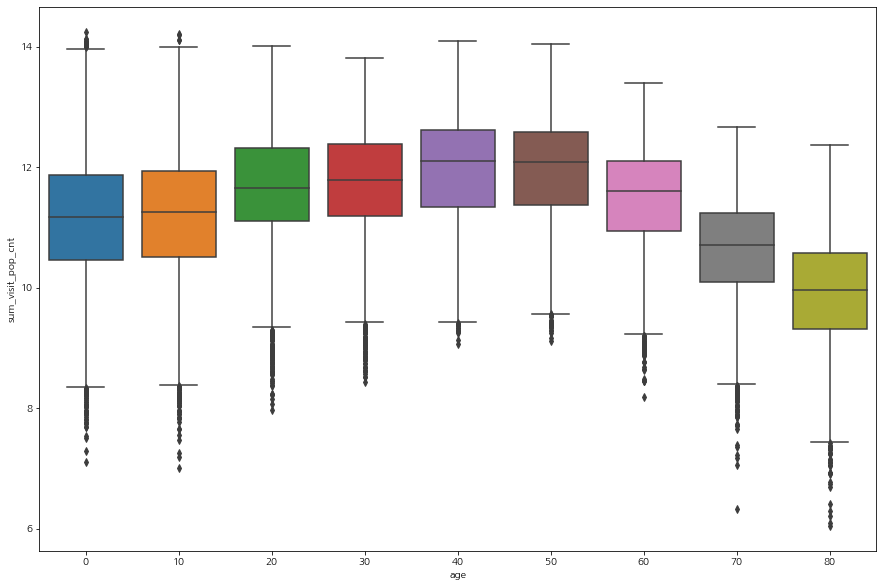

In [73]:
x = korean_df['age']
#y = korean_df['sum_work_pop_cnt']
# y축 로그변환
y = np.log(korean_df['sum_visit_pop_cnt'])

sns.boxplot(x, y, data=korean_df)

plt.show()

# 그룹화
# 40, 50
# 20, 30, 60
# 0, 10
# 70
# 80

### 그룹화

In [3]:
a = korean_df[korean_df['age']==0]
b = korean_df[korean_df['age']==10]
c = korean_df[korean_df['age']==20]
d = korean_df[korean_df['age']==30]
e = korean_df[korean_df['age']==40]
f = korean_df[korean_df['age']==50]
g = korean_df[korean_df['age']==60]
h = korean_df[korean_df['age']==70]
i = korean_df[korean_df['age']==80]

# 그룹화
# 1. 40, 50
# 2. 20, 30, 60
# 3. 0, 10
# 4. 70
# 5. 80

In [149]:
# 1. 40, 50
ttest_ind(e['sum_visit_pop_cnt'], f['sum_visit_pop_cnt'])

Ttest_indResult(statistic=0.7865113557552788, pvalue=0.4315808705332006)

In [34]:
# 2. 20, 30, 60 -> 기각

G1 = pd.concat([c, d, g])


# 일원배치 분산분석(age)
model = ols('sum_visit_pop_cnt ~ C(age)', G1).fit()

print(anova_lm(model))

# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(G1['sum_visit_pop_cnt'], G1['age'], alpha=0.05)
print(posthoc)

# 

                 df               sum_sq            mean_sq        F  PR(>F)
C(age)       2.0000  10387292044108.7695 5193646022054.3848 202.8060  0.0000
Residual 21669.0000 554920116186708.6250   25608939784.3329      nan     nan
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    20     30  12390.5129 0.001   6149.5014  18631.5243   True
    20     60 -38989.7647 0.001 -45230.7762 -32748.7533   True
    30     60 -51380.2776 0.001  -57621.289 -45139.2661   True
--------------------------------------------------------------


In [35]:
# 20, 30으로 그룹화하면 기각 못함 => 20, 30 묶고 60 따로 할까 아님 그냥 묶어버릴까..?
ttest_ind(c['sum_visit_pop_cnt'], d['sum_visit_pop_cnt'])

Ttest_indResult(statistic=-4.1958713458023, pvalue=2.7344854199584033e-05)

In [151]:
# 3. 0, 10
ttest_ind(a['sum_work_pop_cnt'], b['sum_work_pop_cnt'])

Ttest_indResult(statistic=-1.1297830239043527, pvalue=0.2585864217737992)

In [4]:
# 70, 80
ttest_ind(h['sum_visit_pop_cnt'], i['sum_visit_pop_cnt'])

Ttest_indResult(statistic=41.77970337892572, pvalue=0.0)

In [5]:
# 60, 70, 80
G1 = pd.concat([g, h, i])


# 일원배치 분산분석(age)
model = ols('sum_visit_pop_cnt ~ C(age)', G1).fit()

print(anova_lm(model))

# 다중비교 (Tukey)

posthoc = pairwise_tukeyhsd(G1['sum_visit_pop_cnt'], G1['age'], alpha=0.05)
print(posthoc)

                 df               sum_sq             mean_sq         F  PR(>F)
C(age)       2.0000  47551474933066.5000 23775737466533.2500 4146.0612  0.0000
Residual 21669.0000 124261662967410.8125     5734536109.9917       nan     nan
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    60     70  -81968.0449 0.001  -84921.3501  -79014.7398   True
    60     80 -110515.1294 0.001 -113468.4346 -107561.8243   True
    70     80  -28547.0845 0.001  -31500.3897  -25593.7793   True
-----------------------------------------------------------------


### 군집화

In [26]:
korean_df1 = korean_df.groupby('age').sum()
korean_df1 = korean_df1.drop(['emd_cd', 'count_num'], axis=1)
korean_df1

,sum_resd_pop_cnt,sum_work_pop_cnt,sum_visit_pop_cnt
age,,,
0,1963866907.0024,174135332.8944,864808353.8761
10,2011889486.6933,182856320.5450,906337050.8254
20,1506648894.5201,235702062.3954,1300002711.6226
30,1886099616.9693,255337376.6329,1389511776.6739
40,2835690080.9992,354434790.7666,1710054251.9188
50,2800987525.5119,324796395.5039,1689538793.2152
60,1822003352.5264,135742352.8080,1018340651.3635
70,987745298.1129,44434109.7798,426203494.7715
80,517068237.4753,22953054.4965,219979356.4051


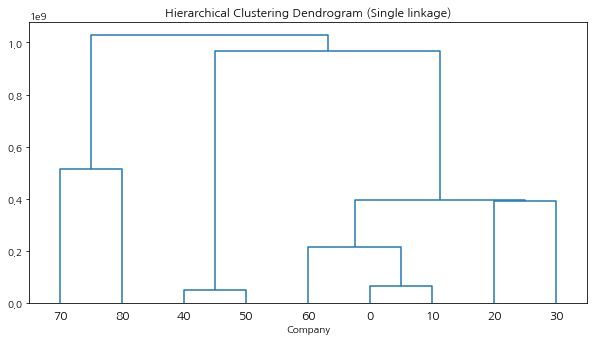

In [27]:
Z = linkage(korean_df1, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=korean_df1.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()